In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/train (1).csv" , usecols = ["GarageQual","FireplaceQu","SalePrice"])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [6]:
df.isnull().mean() * 100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


<Axes: xlabel='GarageQual'>

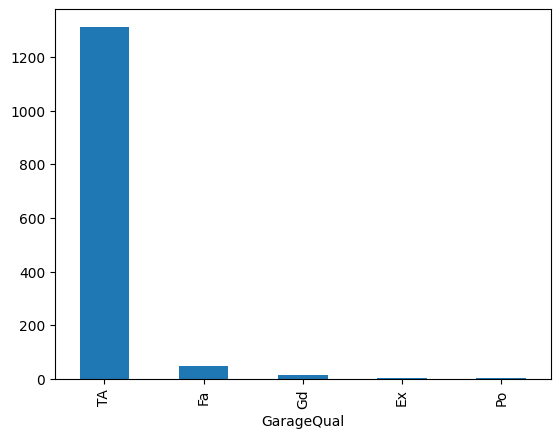

In [7]:
df["GarageQual"].value_counts().plot(kind = "bar")

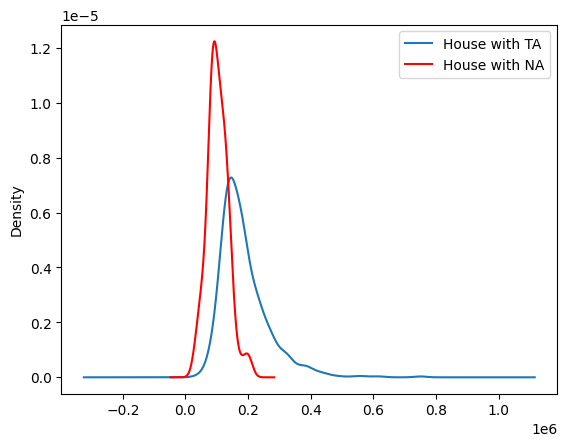

In [9]:
df[df["GarageQual"] == "TA"]["SalePrice"].plot(kind = "kde" , label = "House with TA")
df[df["GarageQual"].isnull()]["SalePrice"].plot(kind = "kde" , color = "red" , label = "House with NA")
plt.legend()
plt.show()

In [10]:
temp = df[df["GarageQual"] == "TA"]["SalePrice"]

In [11]:
df["GarageQual"].fillna("TA",inplace = True)

<ipython-input-11-c6bcec44b044>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["GarageQual"].fillna("TA",inplace = True)


<Axes: xlabel='GarageQual'>

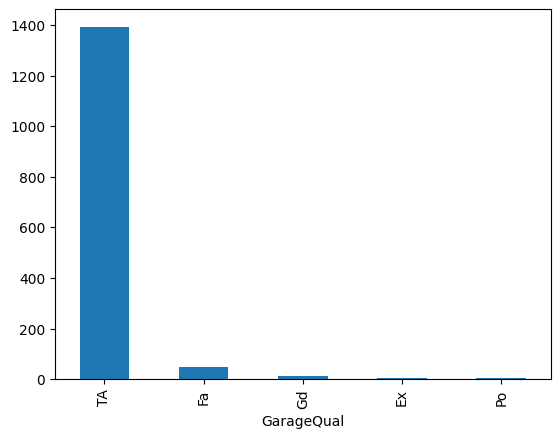

In [12]:
df["GarageQual"].value_counts().plot(kind = "bar")

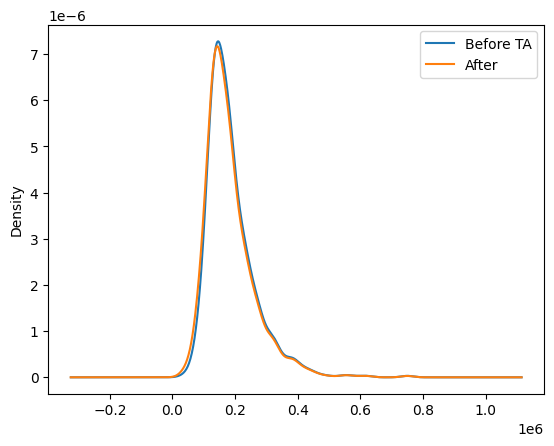

In [16]:
## Comparing

temp.plot(kind = "kde" , label = "Before TA")

df[df["GarageQual"] == "TA"]["SalePrice"].plot(kind ="kde" , label = "After")
plt.legend()

<Axes: xlabel='FireplaceQu'>

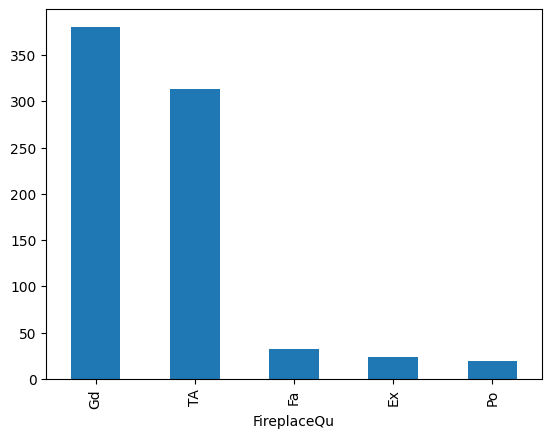

In [17]:
df["FireplaceQu"].value_counts().plot(kind = "bar")

In [18]:
df["FireplaceQu"].mode()

,FireplaceQu
0,Gd


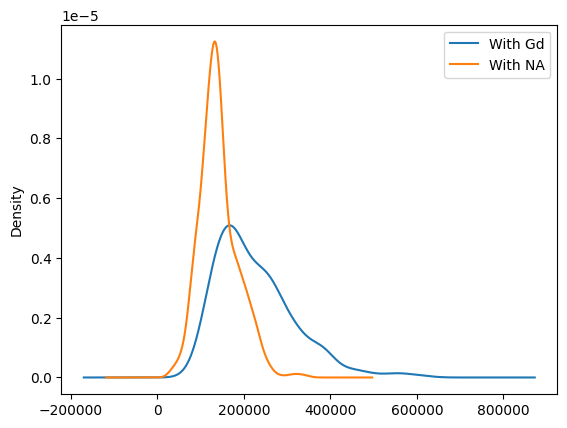

In [19]:
df[df["FireplaceQu"] == "Gd"]["SalePrice"].plot(kind = "kde", label = "With Gd")
df[df["FireplaceQu"].isnull()]["SalePrice"].plot(kind = "kde", label = "With NA")
plt.legend()

In [20]:
temp = df[df["FireplaceQu"] == "Gd"]["SalePrice"]
temp.head()

,SalePrice
3,140000
6,307000
11,345000
13,279500
20,325300


In [22]:
len(temp)

380

In [23]:
df["FireplaceQu"].fillna("Gd", inplace = True)

<ipython-input-23-96ef47abbc88>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["FireplaceQu"].fillna("Gd", inplace = True)


In [25]:
len(df[df["FireplaceQu"] == "Gd"]["SalePrice"])

1070

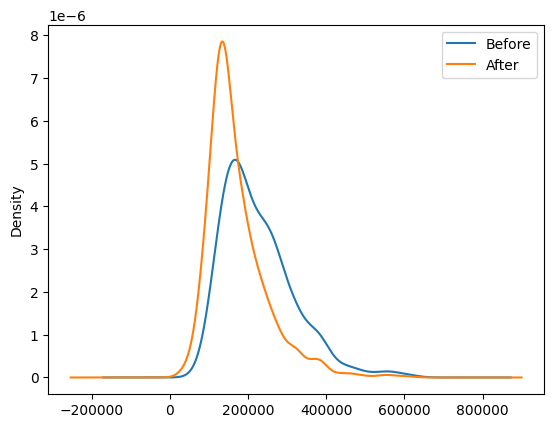

In [26]:
temp.plot(kind = "kde"  , label = "Before")
df[df["FireplaceQu"] == "Gd"]["SalePrice"].plot(kind = "kde" , label = "After")
plt.legend()

In [27]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_trian , y_test = train_test_split(df.drop("SalePrice" , axis = 1) ,
                                                       df["SalePrice"] , test_size = 0.3
                                                       , random_state = 0)

In [28]:
 from sklearn.impute import SimpleImputer
 imputer = SimpleImputer(strategy = "most_frequent")
 imputer.fit(X_train)

SimpleImputer(strategy='most_frequent')

In [29]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [30]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

In [31]:
imputer.n_features_in_

2

In [32]:
imputer.feature_names_in_

array(['FireplaceQu', 'GarageQual'], dtype=object)